# Workshop: Decision Trees 

The objective of this workshop is to introduce you to the concept of decision trees and how to use them for classification tasks.

For this workshop, we will participate in a Kaggle competition. The competition is called [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal is to predict whether a passenger survived the sinking of the Titanic or not. For each passenger in the test set, we must predict a 0 or 1 value for the variable.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Exercise 1: Load the data

You can download the data from the Kaggle website or you can directly code on the Kaggle website. The data is available in the `data` folder. The data is split into two groups:
- training set (`train.csv`)
- test set (`test.csv`)

You objectif will be to load both datasets and explore them. As the datasets contain unique identifiers for each passenger, you will need to drop them before training your model. Otherwise, the dataset contains some missing values and categorical variables. You will need to deal with them before training your model.

In [2]:


df = pd.read_csv("titanic.csv").dropna()

# Save labels in a new variable
LABELS = df['Survived']

# Drop useless columns
df.drop('Survived',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)

# Convert categorical features into numerical features
df["Sex"] = df["Sex"].map({"female": 0, "male":1})
df["Embarked"] = df["Embarked"].map({"S": 0, "C":1, "Q":2})

df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,0,38.0,1,0,71.2833,1
3,1,0,35.0,1,0,53.1000,0
6,1,1,54.0,0,0,51.8625,0
10,3,0,4.0,1,1,16.7000,0
11,1,0,58.0,0,0,26.5500,0


#### Exercise 2: Study the data

Before training your model, you should study the data. First of all, you should study if the data can be separated into two groups. In order to do so, you can plot the distribution of the target variable.

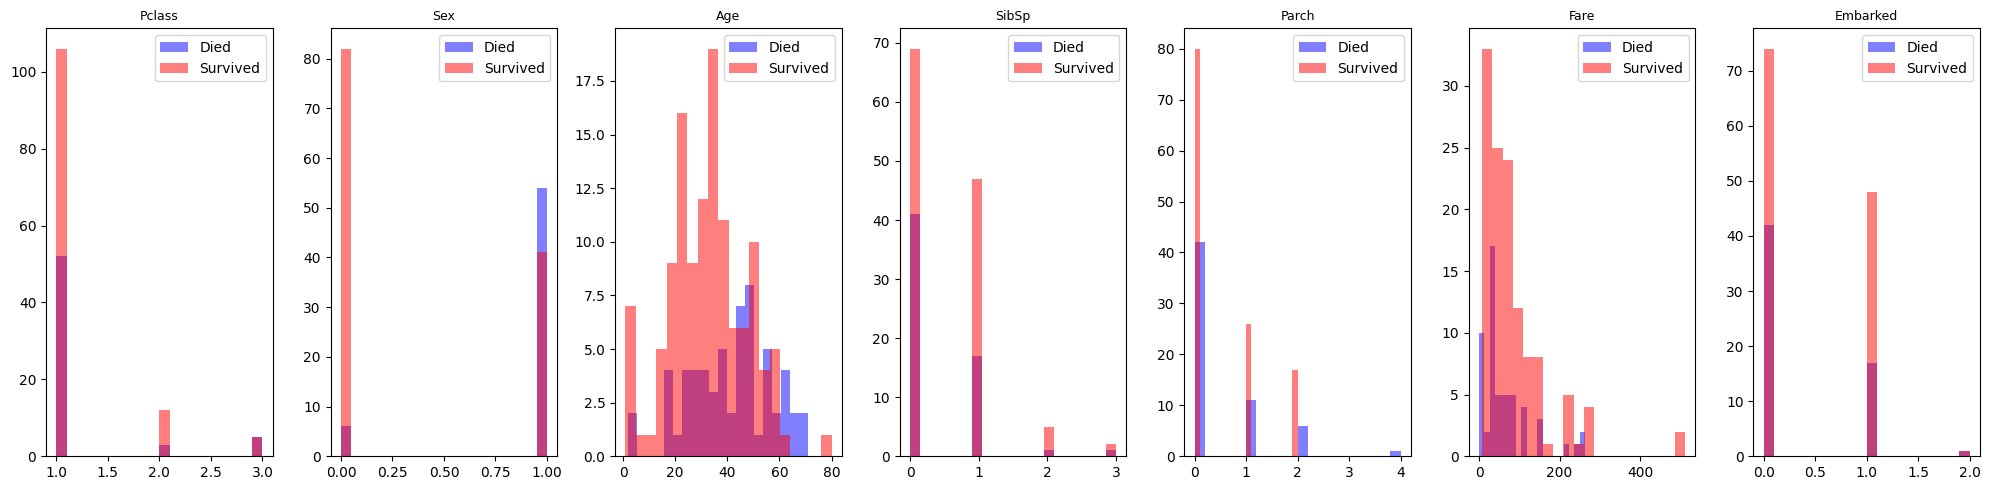

In [3]:

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))

# For each feature, plot the histogram of benign and malignant values

for i, ax in enumerate(axes.flat):
    ax.hist(df[df.columns[i]][LABELS==0], bins=20, alpha=0.5, label='Died', color='blue')
    ax.hist(df[df.columns[i]][LABELS==1], bins=20, alpha=0.5, label='Survived', color='red')
    ax.set_title(df.columns[i], fontsize=9)
    ax.legend()

plt.tight_layout()
plt.show()

Normally, you would see that the data cannot be separated into two groups throw a unique value. Indeed, the data is not linearly separable, people with similar characteristics can have different outcomes. Therefore, you will need to use a non-linear model to classify the data such as a decision tree.

#### Exercise 4: Estimate the most important features

Now that you have define that you need to use a non-linear model. We will search for the most important features. In order to do so, you will need to train a decision tree (such as ExtraTreesClassifier) and estimate the importance of each feature. You can use the `feature_importances_` attribute of the decision tree to estimate the importance of each feature.

In [4]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(df, LABELS)

importances = clf.feature_importances_
# Sort the features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(df.shape[1]):
    print("%d. %s (%.2f)" % (f + 1, df.columns[indices[f]], importances[indices[f]] * 100))

Feature ranking:
1. Age (30.43)
2. Sex (27.43)
3. Fare (26.00)
4. Parch (5.04)
5. SibSp (4.73)
6. Embarked (3.21)
7. Pclass (3.16)


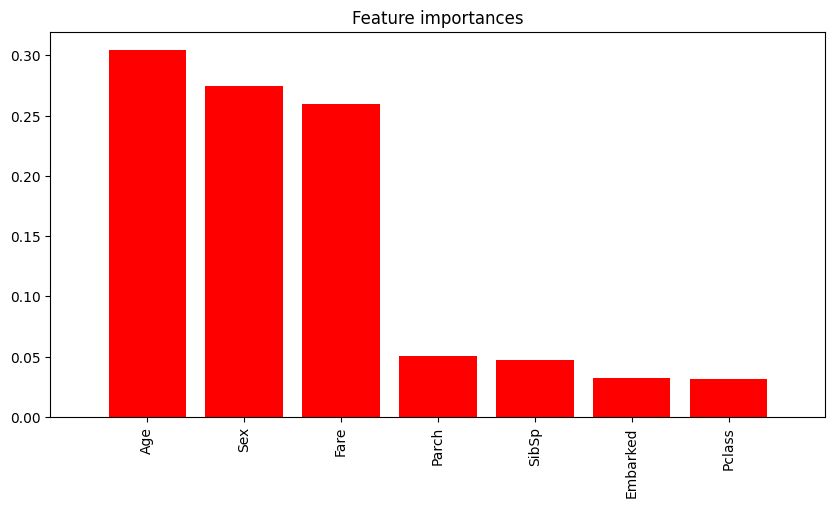

In [5]:
# Plot the feature importances of the forest

plt.figure(figsize=(10, 5))
plt.title("Feature importances")
plt.bar(range(df.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(df.shape[1]), df.columns[indices], rotation='vertical')
plt.xlim([-1, df.shape[1]])
plt.show()

#### Exercise 5: Plot the data in order to see the decision boundaries

Now that you have found the most important features, you can plot the data in order to see the decision boundaries. In order to do so, first you will try to plot the data in 3D. Then, you will try to plot two subplots (one for each sex) in 2D.

What can you conclude from the plots?

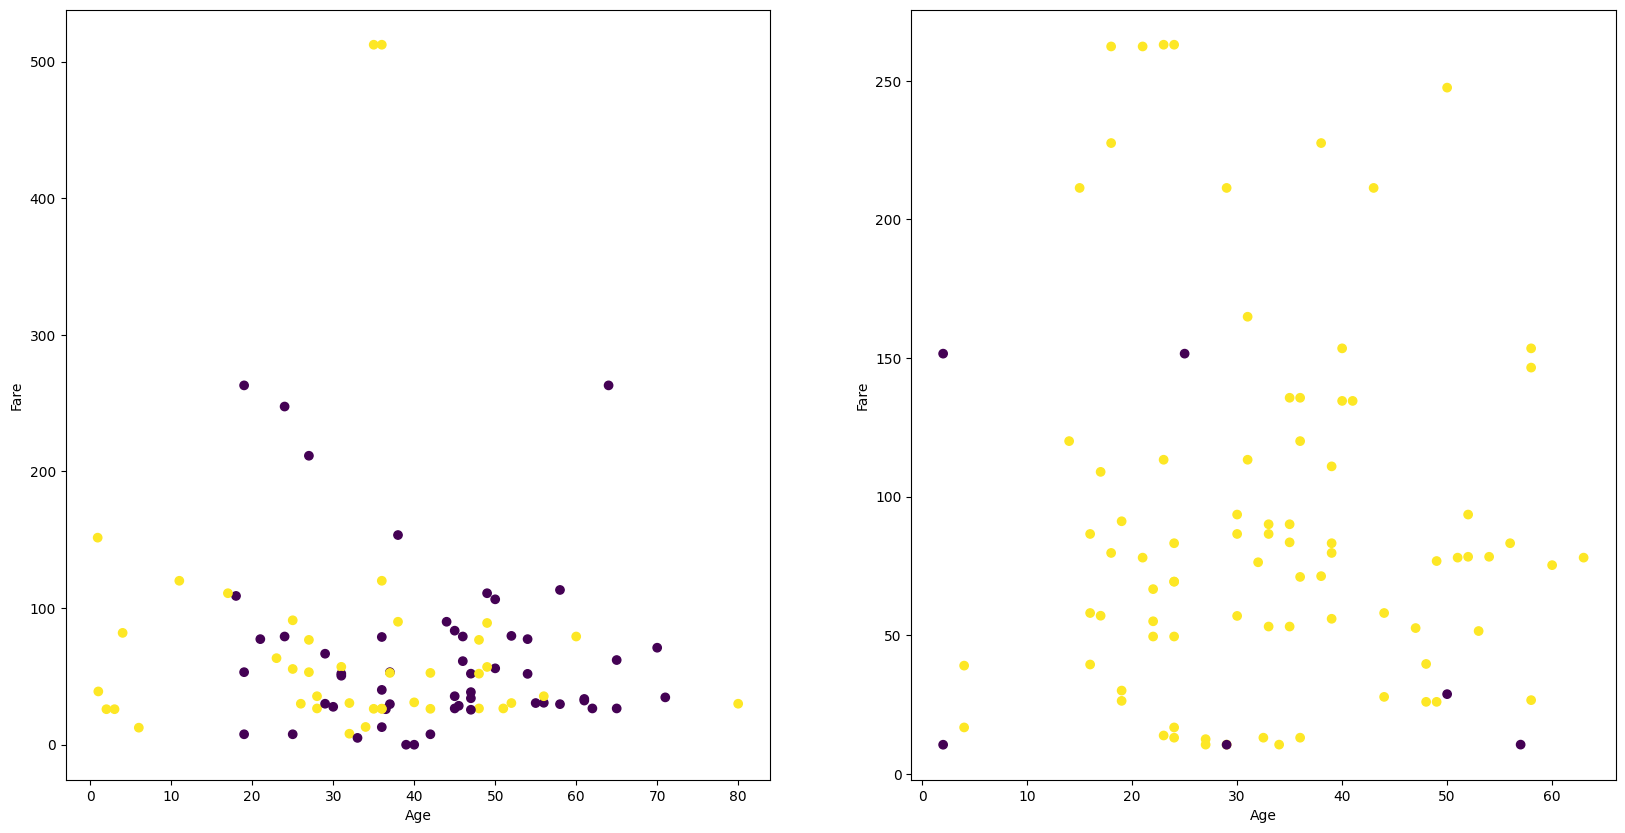

In [12]:
# df where sex is 0
maleDF = df.where(df["Sex"] == 0).dropna()
femaleDF = df.where(df["Sex"] == 1).dropna()

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

dfList = [femaleDF, maleDF]

for i, ax in enumerate(ax.flatten()):
    ax.scatter(x=dfList[i]["Age"], y=dfList[i]["Fare"], c=LABELS[dfList[i].index])
    ax.set_xlabel("Age")
    ax.set_ylabel("Fare")
plt.show()

import plotly.express as px

fig = px.scatter_3d(df, x="Sex", y="Age", z="Fare",
                    color=LABELS)
fig.show()


#### Exercise 6: Train a decision tree

Now that you have found the most important features, and that you know more about the data, you can train a decision tree. You can use the `DecisionTreeClassifier` from `sklearn.tree`. Print the accuracy of the model on the training set and on the test set. And, plot the decision tree.

What can you conclude from the decision tree? Is it overfitting? If yes, how can you reduce overfitting?

Try to set the max_depth to 1 and plot the decision tree and the accuracy. What can you conclude?

0.8032786885245902


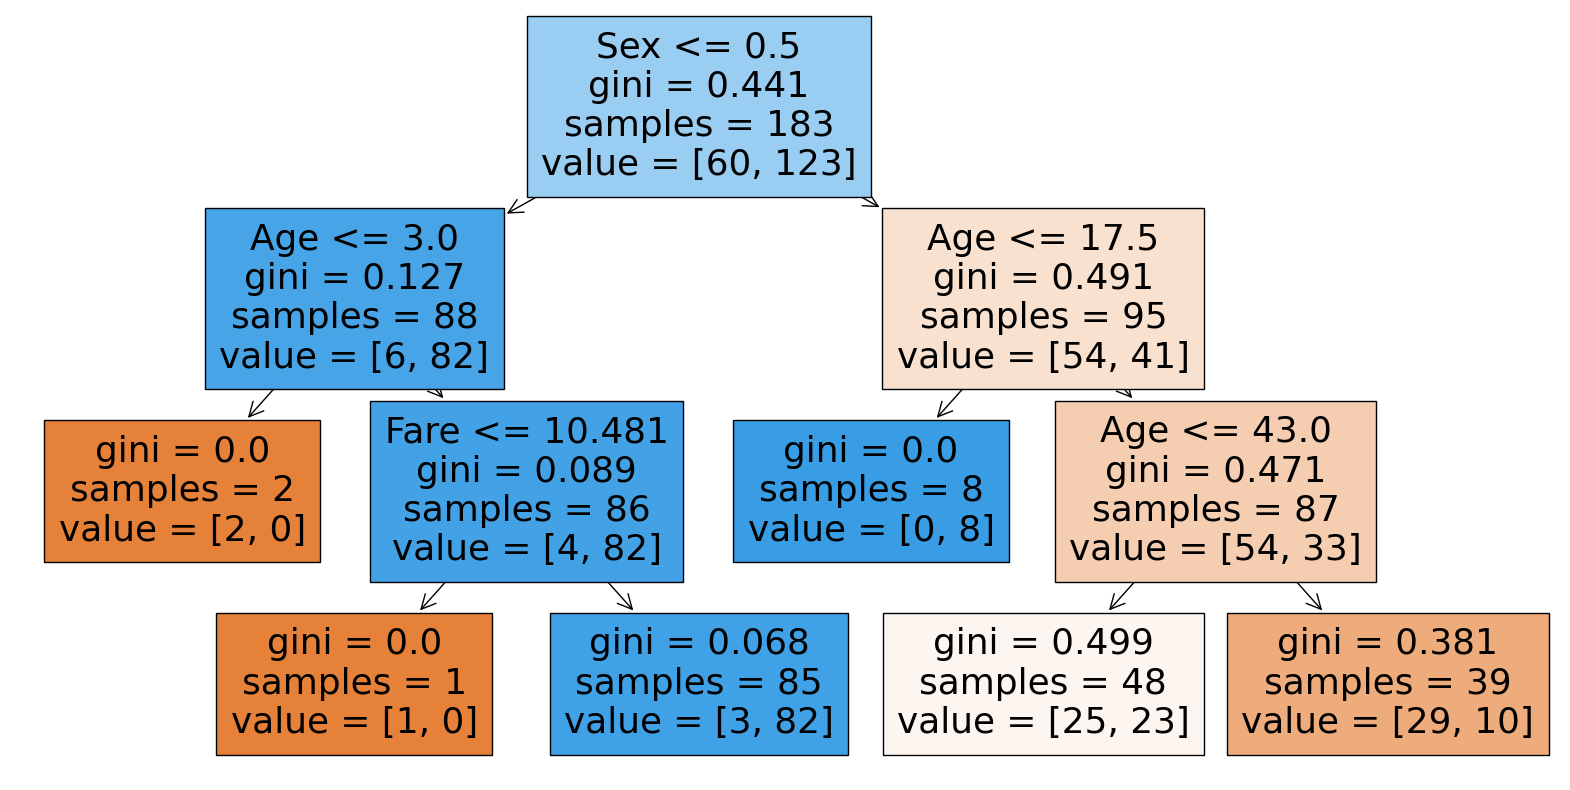

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3)

clf.fit(df, LABELS)

print(clf.score(df, LABELS))

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=df.columns, filled=True)
plt.show()



#### Exercise 7: Train a random forest

In our way to increase the accuracy of our model, we will train a random forest. A random forest is an ensemble of decision trees, where each tree is trained on a random subset of the data. You can use the `RandomForestClassifier` from `sklearn.ensemble`. Print the accuracy of the model on the training set and on the test set. And, plot the decision tree.

0.8142076502732241


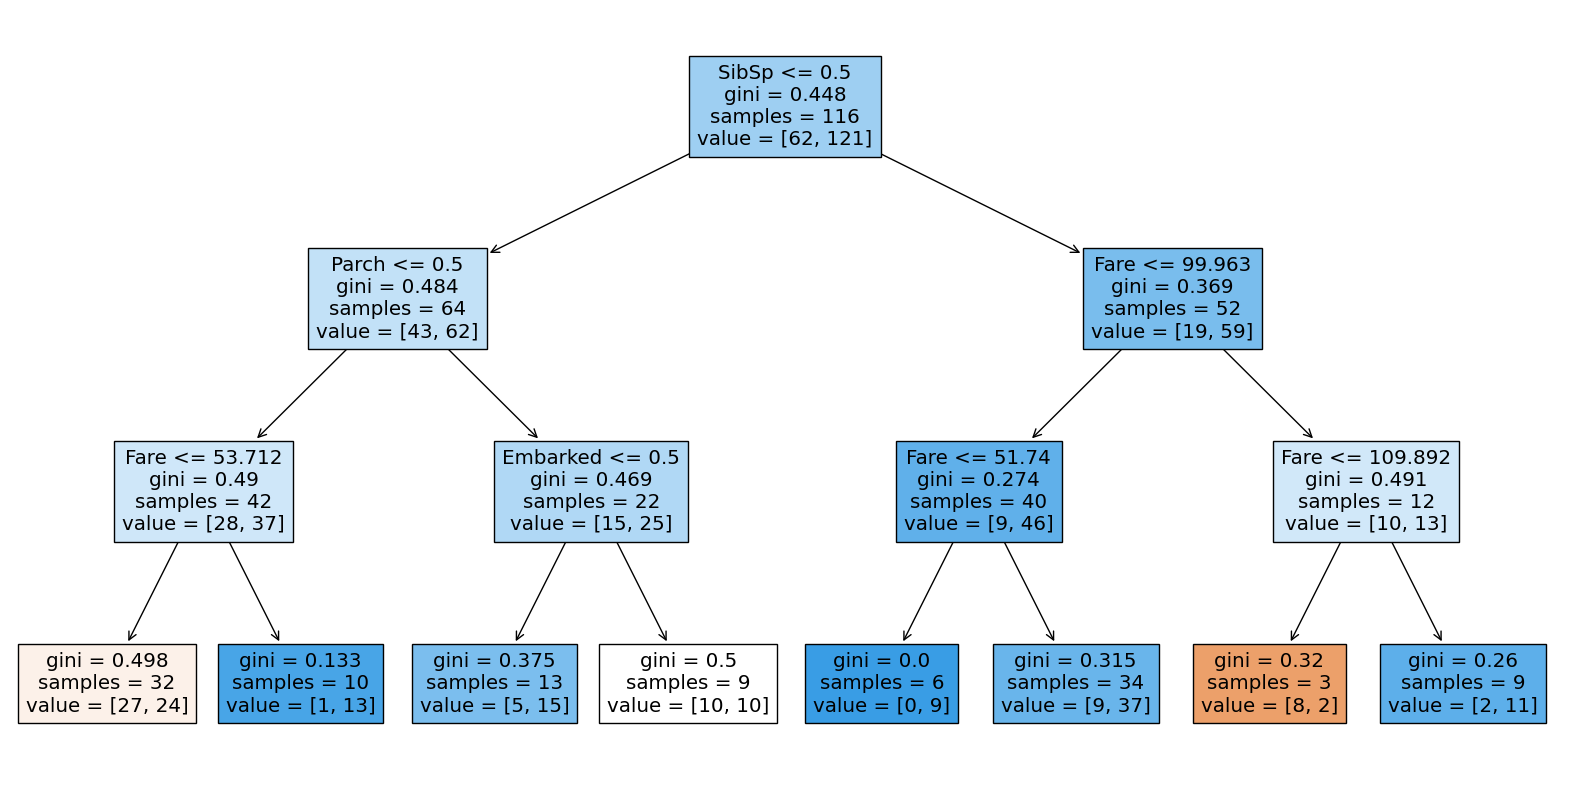

In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

clf.fit(df, LABELS)

print(clf.score(df, LABELS))

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=df.columns, filled=True)
plt.show()

#### Exercise 8: Train a gradient boosting

Another way to increase the accuracy of our model, we will train a gradient boosting. A gradient boosting is an ensemble of decision trees, where each tree is trained on the error of the previous tree. You can use the `GradientBoostingClassifier` from `sklearn.ensemble`. Print the accuracy of the model on the training set and on the test set. And, plot the decision tree.

0.9836065573770492


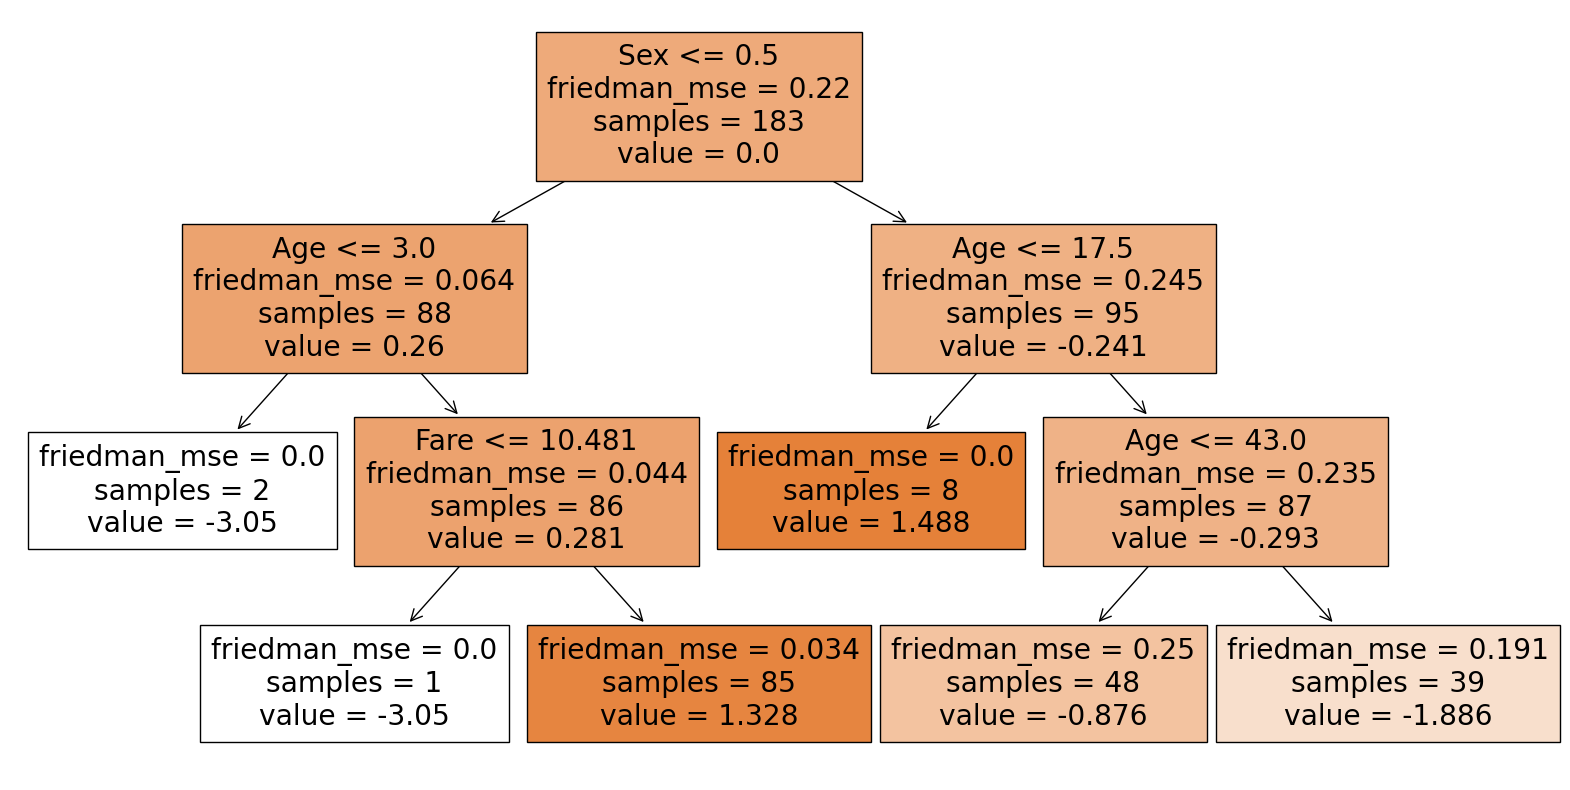

In [9]:
# gradient boosting

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=0)

clf.fit(df, LABELS)

print(clf.score(df, LABELS))

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0][0], feature_names=df.columns, filled=True)
plt.show()

#### Exercise 9: Train a AdaBoost

An alternative to the Gradient Boosting Classifier, is the AdaBoost. A AdaBoost is as a gradient boosting but where each tree is trained on the error of the previous tree with a different weight. You can use the `AdaBoostClassifier` from `sklearn.ensemble`. Print the accuracy of the model on the training set and on the test set. And, plot the decision tree.

0.9508196721311475


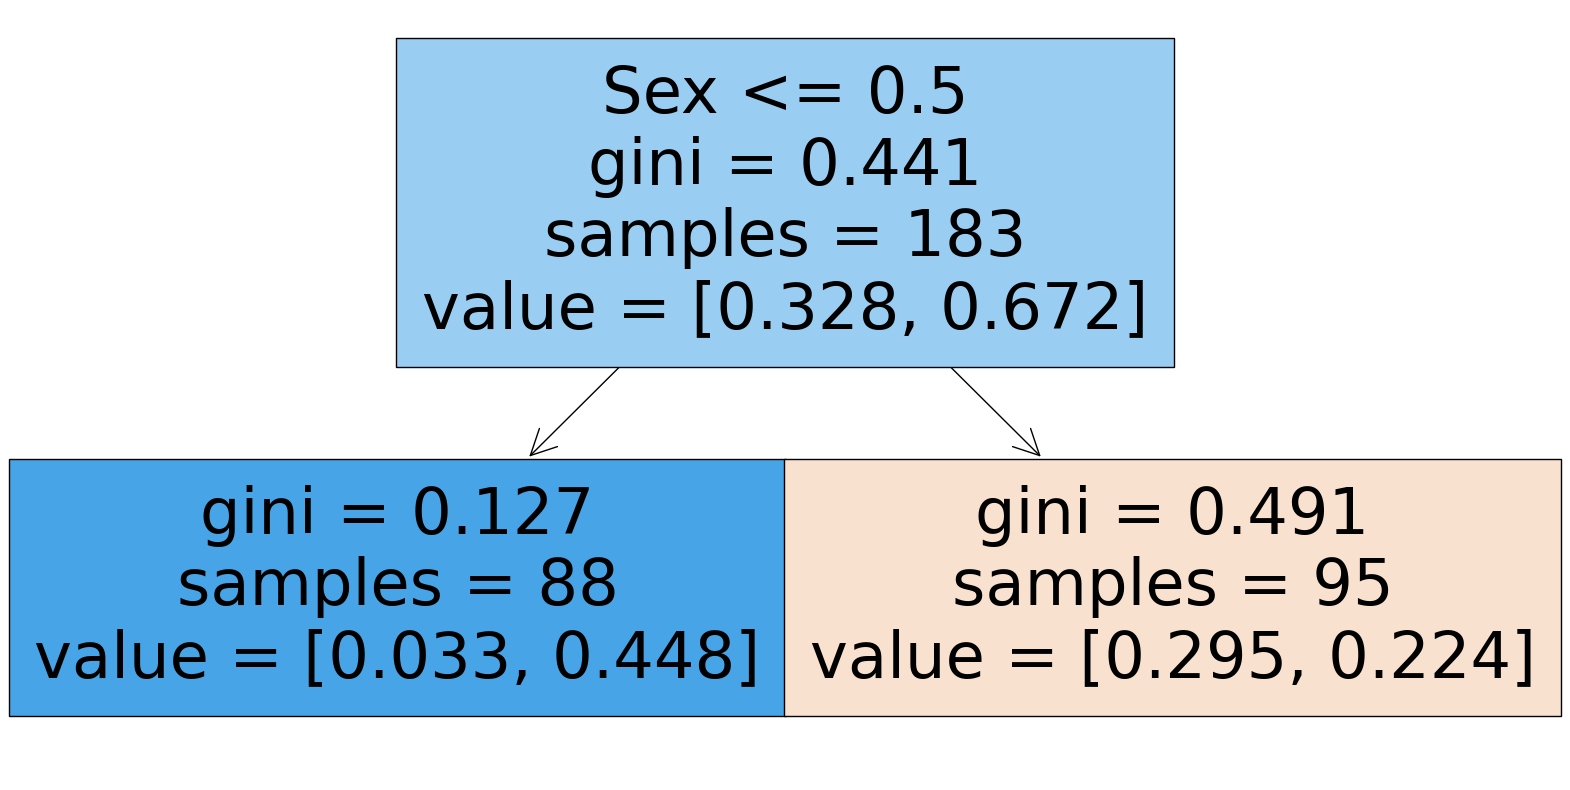

In [10]:
# adaboost

from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100)

clf.fit(df, LABELS)

print(clf.score(df, LABELS))

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=df.columns, filled=True)
plt.show()

#### Exercise 10: Optimize the hyperparameters

Now that you have trained different models, you can try to optimize the hyperparameters of the model. You can use the `GridSearchCV` from `sklearn.model_selection` to optimize the hyperparameters. You can try to optimize the hyperparameters of the decision tree, the random forest, the gradient boosting and the AdaBoost.

In [11]:
# Import grid search cv

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search

param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 10],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                            cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data

grid_search.fit(df, LABELS)

# Print the best parameters

print(grid_search.best_params_)

# Print the best score

print(grid_search.best_score_)

# Print the best estimator

print(grid_search.best_estimator_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200; total time=   0.4s
[CV] END b

#### Exercise 11: Make a submission

Now that you have trained different models and found the best hyperparameters, you can make a submission on Kaggle. You can use the `submission.csv` file to make a submission. You can use the `to_csv` method from `pandas` to create a csv file.

In order to increase your score, try to make your model more generalizable. As the titanic result contains a lot of missing values, you can try to fill them with the median or the mean of the column. You can also try to create new features from the existing ones.

With everything you have learned, you should be able to reach a score of 0.75 or 0.80.

# Conclusion

In this workshop, we have seen how to use decision trees for classification tasks. We have seen that decision trees are easy to interpret but they tend to overfit. We have seen that we can reduce overfitting by limiting the depth of the tree or by using an ensemble of decision trees.

# To go further

Multiple other classifying algorithms exist. You can try to use them and compare their performance. You can find a list of classifying algorithms on the [scikit-learn website](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).